# Radar observation : rainfall composite product, rainfall

The aim of this notebook is to indicate how to read the rainfall data.

For each pixel is indicated a rainfall in hundreth of millimeters (10<sup>-2</sup> mm). If the value is missing then the value is -1.

# Quickstart

In [6]:
from data_exploration.utils.user_configuration import *
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 

In [7]:
####Cell containing the modifiable fields######
data_path = path + 'radar/rainfall/'   #path to the rainfall data
zone = 'NW'      #study zone 
year = 2016
month = 8
decade = 3
ind = 5 #number of the chosen 5 min of the decade for the plot

<IPython.core.display.Javascript object>


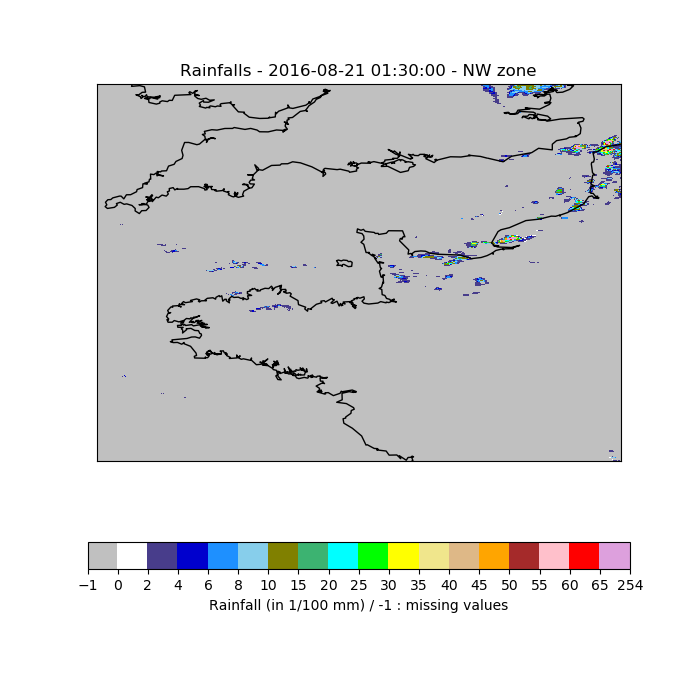

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [8]:
file = 'rainfall_' + zone + '_' + str(year) + '_' + "{0:0=2d}".format(month) + '.' + str(decade) + '.npz'

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

####data loading
d = np.load(data_path+file, allow_pickle=True)
data = d['data']     #rainfall values -> subset of data from the first day day_i to the last day day_f
dates = d['dates']        #associated dates values
miss_dates = d['miss_dates']        #missing dates values

#####plot
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='i',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#colorbar definition
if (np.max(data) > 65):
    borne_max = np.max(data)
else:
    borne_max = 65 + 10
cmap = colors.ListedColormap(['silver','white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                                  ,'cyan','lime','yellow','khaki','burlywood','orange','brown','pink','red','plum'])
bounds = [-1,0,2,4,6,8,10,15,20,25,30,35,40,45,50,55,60,65,borne_max]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(data[ind,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm)
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Rainfall (in 1/100 mm) / '+ 
                                                                                                              str(-1) +' : missing values')
plt.title("Rainfalls - "+ str(dates[ind]) + " - "+  zone + " zone")
plt.show()

# More details

The data are stored per period of 10 or 11 days per geographic zone (each month is separated in 3 files). The zones called 'NW' (for North-West of France) and 'SE' (for South-East of France).

The time step is 5 min (per day, start hour :00h and end hour : 23h55), the spatial resolution, 0.01° (the projection system is EPSG:4326).

Each file contains 3 data categories : 
<ul>
    <li>'data' : rainfall values </li>
    <li>'dates' : the associated dates to the rainfall values</li>
    <li>'miss_dates' : the dates for which the data are missing</li>
</ul>

**To get the coordinates (lat,lon) of the points :**
One npz file contains 2 arrays : one for the latitudes and one for the longitudes.

Dimensions of the 'data' array: 
<ul>
<li>time dimension (number of 5 min records)</li> 
<li>points number for longitude</li>
<li>points number for latitude</li>
</ul>    

In [9]:
data.shape

(45, 565, 784)

Dimensions of the 'dates' array:
<ul>
    <li>time dimension (number of 5 min records for which there are data)</li>
</ul>

In [10]:
dates.shape

(45,)

Dimensions of the 'miss_dates' array:
<ul>
    <li>time dimension (dates for which there are no data)</li>
</ul>

In [11]:
miss_dates.shape

(3123,)

Overview of 'data' values of type int16 :

In [12]:
data

array([[[-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       [[-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       [[-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       ...,

       [[-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0

Overview of 'dates' of type datetime.datetime

In [13]:
dates

array([datetime.datetime(2016, 8, 21, 0, 10),
       datetime.datetime(2016, 8, 21, 0, 55),
       datetime.datetime(2016, 8, 21, 1, 0),
       datetime.datetime(2016, 8, 21, 1, 10),
       datetime.datetime(2016, 8, 21, 1, 25),
       datetime.datetime(2016, 8, 21, 1, 30),
       datetime.datetime(2016, 8, 21, 1, 35),
       datetime.datetime(2016, 8, 28, 10, 0),
       datetime.datetime(2016, 8, 28, 10, 5),
       datetime.datetime(2016, 8, 28, 10, 10),
       datetime.datetime(2016, 8, 28, 10, 15),
       datetime.datetime(2016, 8, 28, 10, 20),
       datetime.datetime(2016, 8, 28, 10, 25),
       datetime.datetime(2016, 8, 28, 10, 30),
       datetime.datetime(2016, 8, 28, 10, 35),
       datetime.datetime(2016, 8, 28, 10, 40),
       datetime.datetime(2016, 8, 28, 10, 45),
       datetime.datetime(2016, 8, 28, 10, 50),
       datetime.datetime(2016, 8, 28, 10, 55),
       datetime.datetime(2016, 8, 28, 11, 0),
       datetime.datetime(2016, 8, 28, 11, 5),
       datetime.datetime(

Overview of 'miss_dates' of type datetime.datetime

In [14]:
miss_dates

array([datetime.datetime(2016, 8, 21, 0, 0),
       datetime.datetime(2016, 8, 21, 0, 5),
       datetime.datetime(2016, 8, 21, 0, 15), ...,
       datetime.datetime(2016, 8, 31, 23, 45),
       datetime.datetime(2016, 8, 31, 23, 50),
       datetime.datetime(2016, 8, 31, 23, 55)], dtype=object)

In [15]:
#get the coordinates of the points
coords_path = path + 'radar/'
coords_file = 'radar_coords_' + zone + '.npz'
coords = np.load(coords_path + coords_file, allow_pickle=True)
lat = coords['lats']
lon = coords['lons']

Overview of latitudes:

In [16]:
lat

array([[51.896, 51.896, 51.896, ..., 51.896, 51.896, 51.896],
       [51.886, 51.886, 51.886, ..., 51.886, 51.886, 51.886],
       [51.876, 51.876, 51.876, ..., 51.876, 51.876, 51.876],
       ...,
       [46.276, 46.276, 46.276, ..., 46.276, 46.276, 46.276],
       [46.266, 46.266, 46.266, ..., 46.266, 46.266, 46.266],
       [46.256, 46.256, 46.256, ..., 46.256, 46.256, 46.256]])

In [17]:
d.fid.close()